In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as mlt
import seaborn as sns
import os
mlt.style.use('fivethirtyeight')
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
from subprocess import check_output
#print(check_output(["ls", "../input"]).decode("utf8"))

In [2]:
import os

In [3]:
from subprocess import check_output
print(check_output(["dir"], shell=True).decode("utf8"))  # For Windows, use 'dir' instead of 'ls'


 Volume in drive C is Windows
 Volume Serial Number is CC8D-6C55

 Directory of C:\Users\Aditya kumar Dubey\ML

25-09-2024  11:51    <DIR>          .
24-09-2024  18:15    <DIR>          ..
19-09-2024  23:45    <DIR>          .ipynb_checkpoints
18-09-2024  11:41           982,780 EDA.ipynb
18-09-2024  08:11        55,137,805 House.html
25-09-2024  11:51           390,441 IPL.ipynb
23-09-2024  14:58    <DIR>          olympics analysis web app
19-09-2024  23:47               756 Untitled.ipynb
               4 File(s)     56,511,782 bytes
               4 Dir(s)  32,224,923,648 bytes free



In [4]:
import os
print(os.listdir(r"C:\Users\Aditya kumar Dubey\ML"))


['.ipynb_checkpoints', 'EDA.ipynb', 'House.html', 'IPL.ipynb', 'olympics analysis web app', 'Untitled.ipynb']


In [5]:
matches = pd.read_csv(r"C:\Users\Aditya kumar Dubey\OneDrive\Documents\Desktop\Data\matches.csv")
delivery = pd.read_csv(r"C:\Users\Aditya kumar Dubey\OneDrive\Documents\Desktop\Data\deliveries.csv")
matches.head(5)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [6]:
delivery.head(5)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [7]:
#Some cleaning transfromation
#matches.isnull().sum()

matches.drop(['umpire3'],axis = 1 , inplace = True)
delivery.fillna(0,inplace = True)

In [8]:
matches['team1'].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants'],
      dtype=object)

In [9]:
#replaceing the team name with their abbereviation
matches.replace(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants'],['MI','KKR','RCB','DC','CSK','RR','DD','GL','KXIP','SRH','RPS','KTK','PW','RPS'],inplace=True)

In [10]:
matches['team1']

0       MI
1      KKR
2      RCB
3       DC
4      CSK
      ... 
631     DD
632    RCB
633     MI
634    RCB
635     MI
Name: team1, Length: 636, dtype: object

In [11]:
matches['team2']

0      CSK
1       DC
2       RR
3       GL
4       DD
      ... 
631    CSK
632    CSK
633     RR
634     MI
635    CSK
Name: team2, Length: 636, dtype: object

In [12]:
#delivery['batting_team'.unique()

delivery.replace(['Sunrisers Hyderabad', 'Royal Challengers Bangalore',
       'Mumbai Indians', 'Rising Pune Supergiant', 'Gujarat Lions',
       'Kolkata Knight Riders', 'Kings XI Punjab', 'Delhi Daredevils',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants'], ['MI','KKR','RCB','DC','CSK','RR','DD','GL','KXIP','SRH','RPS','KTK','PW','RPS'],inplace = True)

some basic analysis

In [13]:
print("Total matche :", matches.shape[0])
print("\n Total City :", matches['city'].unique())
print("\n Teams :", matches['team1'].unique())

Total matche : 636

 Total City : ['Hyderabad' 'Pune' 'Rajkot' 'Indore' 'Bangalore' 'Mumbai' 'Kolkata'
 'Delhi' 'Chandigarh' 'Kanpur' 'Jaipur' 'Chennai' 'Cape Town'
 'Port Elizabeth' 'Durban' 'Centurion' 'East London' 'Johannesburg'
 'Kimberley' 'Bloemfontein' 'Ahmedabad' 'Cuttack' 'Nagpur' 'Dharamsala'
 'Kochi' 'Visakhapatnam' 'Raipur' 'Ranchi' 'Abu Dhabi' 'Sharjah' nan]

 Teams : ['MI' 'KKR' 'RCB' 'DC' 'CSK' 'RR' 'DD' 'GL' 'KXIP' 'SRH' 'RPS' 'KTK' 'PW']


In [14]:
matches.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2'],
      dtype='object')

In [15]:
print("Total Vanue :", matches['venue'].nunique())
print("Umpair :",matches['umpire1'].nunique())

Total Vanue : 35
Umpair : 44


In [16]:
#check the equal columns are not.
#df.name.equals(df.first_name)

In [17]:
print((matches['player_of_match'].value_counts().idxmax()),': has most man of the match awards')
print((matches['winner'].value_counts()).idxmax(),': has the highest number of match wins')

CH Gayle : has most man of the match awards
KKR : has the highest number of match wins


In [18]:
df = matches.iloc[[matches['win_by_runs'].idxmax()]]
df[['season','city', 'team1','team2', 'winner','win_by_runs']]

,season,city,team1,team2,winner,win_by_runs
43,2017,Delhi,KKR,DD,KKR,146


Mumbai Indians(MI) defeated Delhi Daredevils(DD) with the highest run difference

In [19]:
df = matches.iloc[[matches['win_by_wickets'].idxmax()]]
#print(df)
df[['season', 'city', 'team1','team2','winner','win_by_wickets']]

,season,city,team1,team2,winner,win_by_wickets
2,2017,Rajkot,RCB,RR,RR,10


In [20]:
df = matches.iloc[[matches['win_by_wickets'].idxmax()]]
df[['season', 'city', 'team1', 'team2', 'winner', 'win_by_wickets']]


,season,city,team1,team2,winner,win_by_wickets
2,2017,Rajkot,RCB,RR,RR,10


Toss Decision

In [21]:
print("Toss Decisions in % \n", (matches['toss_decision'].value_counts())/577*100)


Toss Decisions in % 
 toss_decision
field    62.911612
bat      47.313692
Name: count, dtype: float64


Toss decision accose season

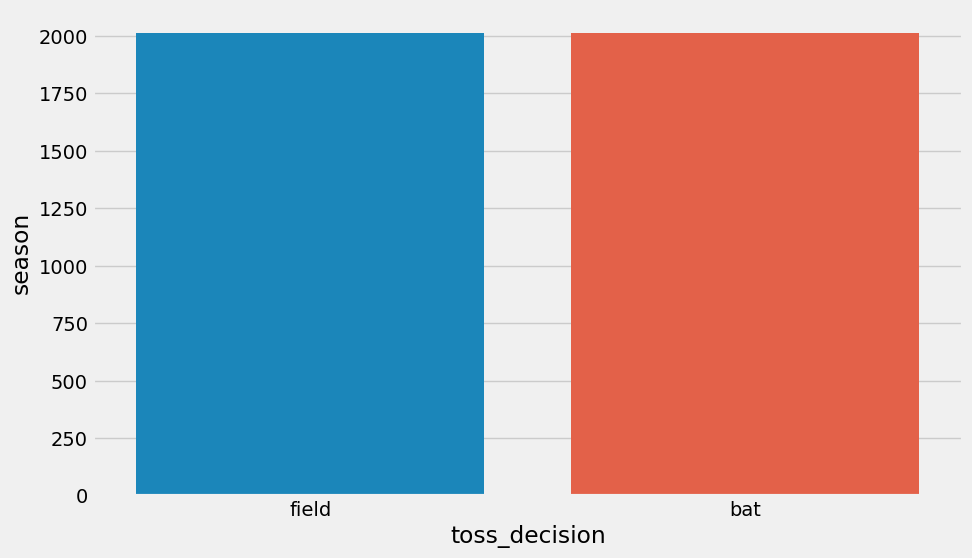

In [22]:
mlt.subplots(figsize = (10,6))
x = matches['toss_decision'].value_counts()
sns.barplot(x = matches['toss_decision'], y = matches['season'] , data = matches)
mlt.show()

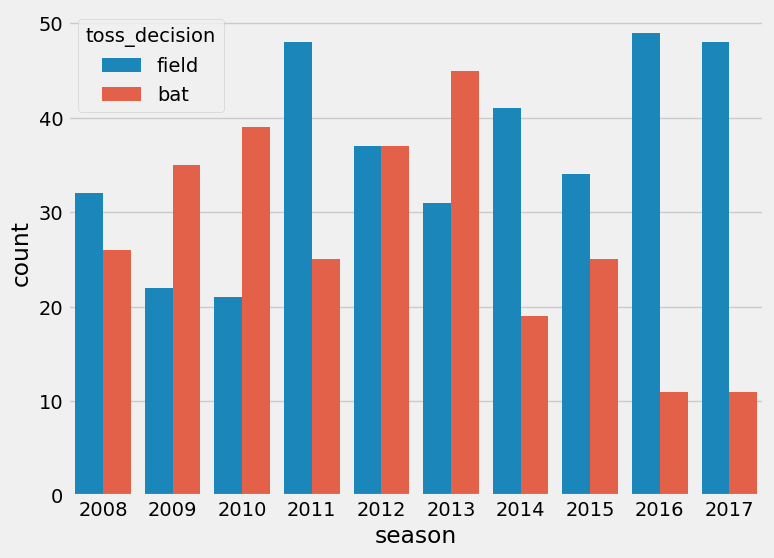

In [23]:
mlt.subplots(figsize = (8,6))
ax = sns.countplot(x = matches['season'] , hue = matches['toss_decision'], data = matches)



Maximum toss winner

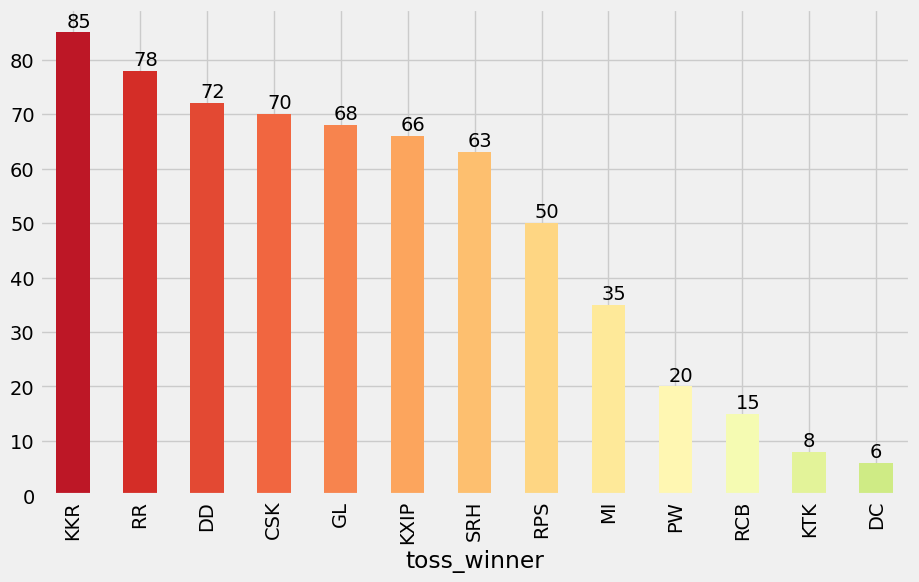

In [24]:
mlt.subplots(figsize = (10,6))
ax = matches['toss_winner'].value_counts().plot(kind = 'bar',color = sns.color_palette('RdYlGn',20))
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))
    
mlt.show()

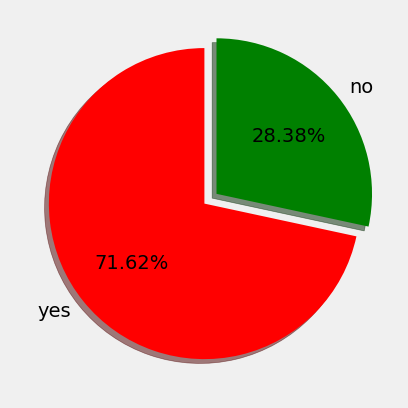

In [25]:
df = matches[matches['toss_winner'] == matches['winner']]
slices = [len(matches), (577 - len(df))]
labels = ['yes', 'no']
mlt.pie(slices,labels = labels, startangle = 90,shadow = True,explode = (0,0.1),autopct = "%0.2f%%",colors = ['r','g'])
mlt.show()

Thus the toss winner is not necessarily the match winner. The match winning probablity for toss winnong team is about 50%-50%

Matches played across each season

<Axes: xlabel='season', ylabel='count'>

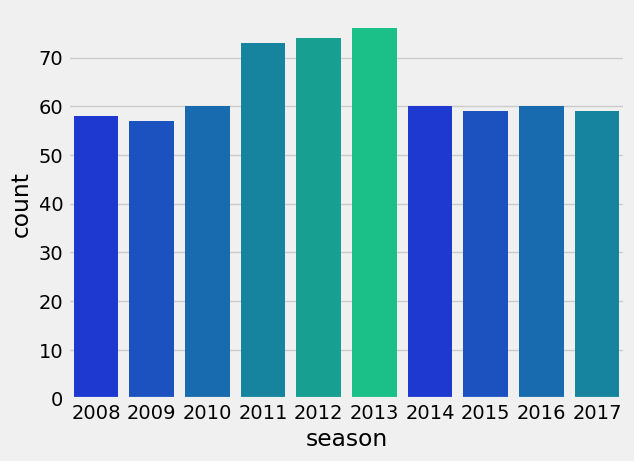

In [26]:
sns.countplot(x = 'season',data = matches, palette = sns.color_palette('winter'))

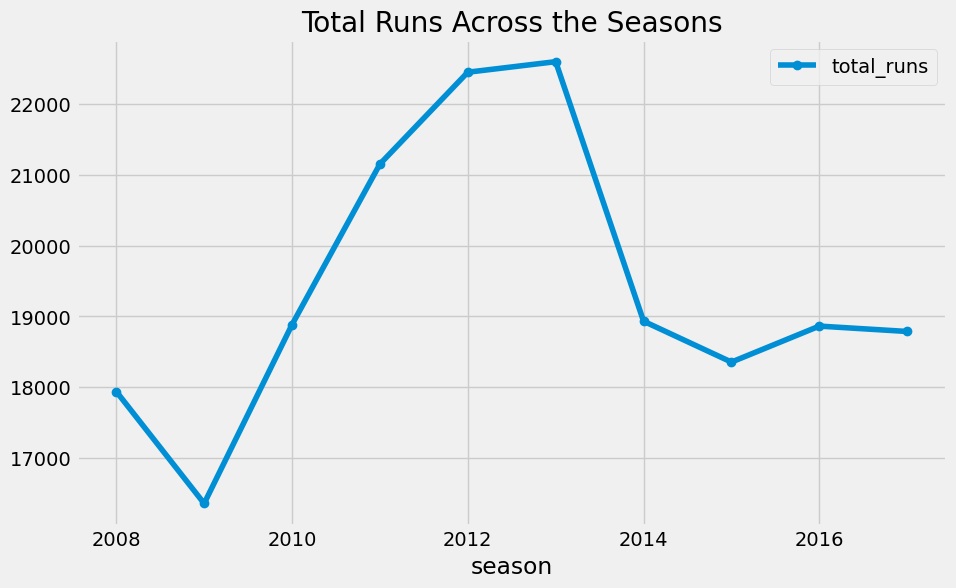

In [27]:
batsmen = matches[['id','season']].merge(delivery,left_on = 'id', right_on = 'match_id', how = 'left').drop('id',axis = 1)
season= batsmen.groupby(['season'])['total_runs'].sum().reset_index()
season.set_index('season').plot(marker = 'o')
mlt.gcf().set_size_inches(10,6)
mlt.title('Total Runs Across the Seasons')
mlt.show()

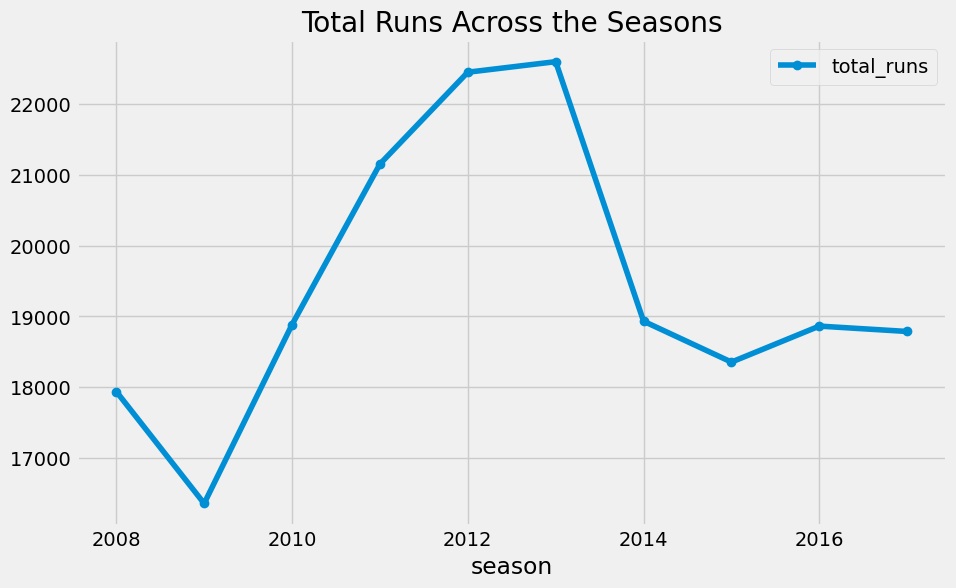

In [41]:
batsmen = matches[['id','season']].merge(delivery, left_on = 'id', right_on = 'match_id', how = 'left').drop('id', axis = 1)
#merging the matches and delivery dataframe by referencing the id and match_id columns respectively
season=batsmen.groupby(['season'])['total_runs'].sum().reset_index()
season.set_index('season').plot(marker='o')
mlt.gcf().set_size_inches(10,6)
mlt.title('Total Runs Across the Seasons')
fig=mlt.gcf()
mlt.show()

Average runs per match in each session

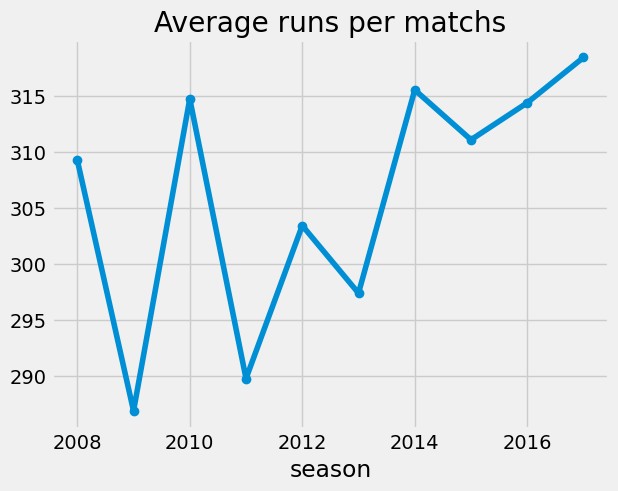

In [29]:
avgruns_each_session =  matches.groupby(['season']).count().id.reset_index()
avgruns_each_session.rename(columns={'id':'matches'},inplace = True)
avgruns_each_session['total_runs'] = season['total_runs']
avgruns_each_session['average_runs_per_match'] = avgruns_each_session['total_runs']/avgruns_each_session['matches']
avgruns_each_session.set_index('season')['average_runs_per_match'].plot(marker = 'o')
mlt.title('Average runs per matchs')
mlt.show()

Six and four accorsing the seasion

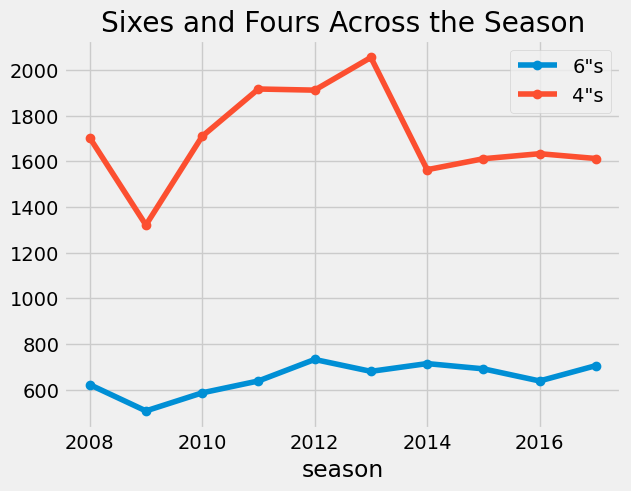

In [42]:
batsmen = matches[['id','season']].merge(delivery, left_on = 'id', right_on = 'match_id', how = 'left').drop('id', axis = 1)
Season_boundaries=batsmen.groupby("season")["batsman_runs"].agg(lambda x: (x==6).sum()).reset_index()
a = batsmen.groupby("season")["batsman_runs"].agg(lambda x: (x==4).sum()).reset_index()
Season_boundaries=Season_boundaries.merge(a,left_on='season',right_on='season',how='left')
Season_boundaries = Season_boundaries.rename(columns = {'batsman_runs_x' : '6"s','batsman_runs_y':'4"s'})
Season_boundaries.set_index('season')[['6"s','4"s']].plot(marker = 'o')
mlt.title("Sixes and Fours Across the Season")
fig=mlt.gcf()
mlt.show()


In [43]:
matches.head(5)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,2017,Hyderabad,2017-04-05,MI,CSK,CSK,field,normal,0,MI,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,2,2017,Pune,2017-04-06,KKR,DC,DC,field,normal,0,DC,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi
2,3,2017,Rajkot,2017-04-07,RCB,RR,RR,field,normal,0,RR,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan
3,4,2017,Indore,2017-04-08,DC,GL,GL,field,normal,0,GL,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin
4,5,2017,Bangalore,2017-04-08,CSK,DD,CSK,bat,normal,0,CSK,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN
